# Feature engineering on Titanic data

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Titanic.csv")
data.shape

(891, 12)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: ylabel='Embarked'>

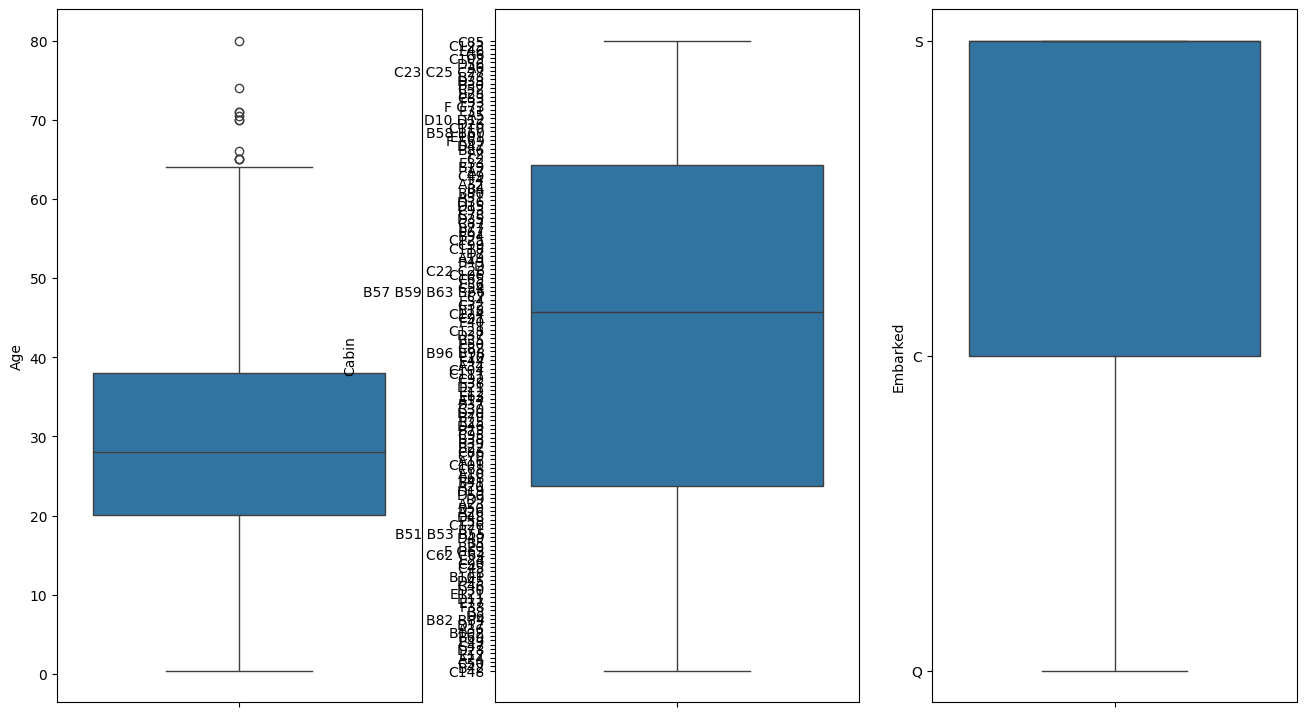

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)

plt.subplot(1,3,1)
sns.boxplot(data["Age"])

plt.subplot(1,3,2)
sns.boxplot(data["Cabin"])

plt.subplot(1,3,3)
sns.boxplot(data["Embarked"])

In [ ]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Cabin"] = data["Cabin"].fillna(data["Cabin"].mode()[0])
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [ ]:
data.isnull().sum().sum()

0

/tmp/ipykernel_268/3691476997.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])
/tmp/ipykernel_268/3691476997.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Fare"])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

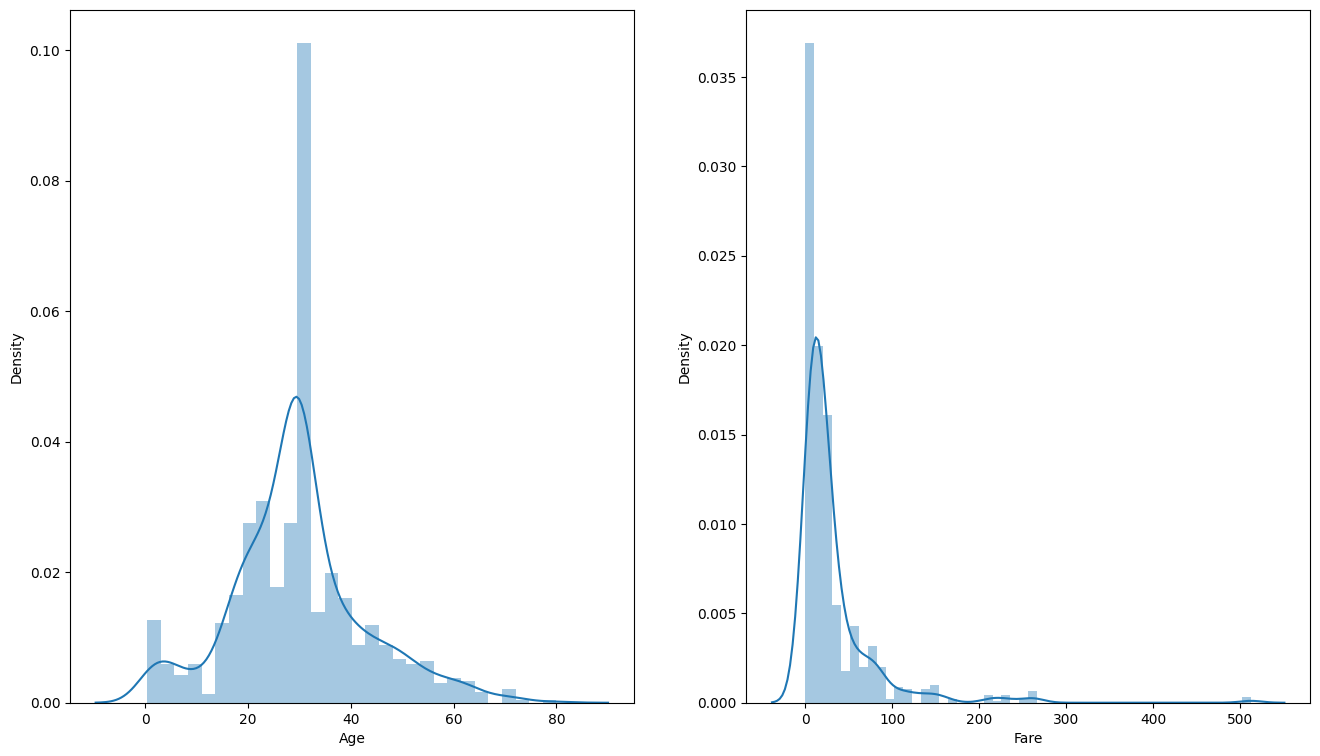

In [ ]:
plt.subplot(1,2,1)
sns.distplot(data["Age"])

plt.subplot(1,2,2)
sns.distplot(data["Fare"])

In [ ]:
def fare_cat(x):
    if x<100:
        return "Cheap"
    else :
        return "Expensive"


data["Fare"] = data["Fare"].apply(fare_cat)
data["Fare"].value_counts()

Fare
Cheap        838
Expensive     53
Name: count, dtype: int64

In [ ]:
def age_cat(x):
    if x<12 :
        return "Kids"
    elif x>=12 and x<18 :
        return "Grown ups"
    elif x>=18 and x<=35 :
        return "Adult"
    elif x>35 :
        return "Old"


data["Age"] = data["Age"].apply(age_cat)
data["Age"].value_counts()

Age
Adult        561
Old          217
Kids          68
Grown ups     45
Name: count, dtype: int64

In [ ]:
data["Familysize"] = data["SibSp"] + data["Parch"] +1
data["Familysize"].value_counts()

Familysize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [ ]:
def fam_cat(x):
    if x == 1 :
        return "Alone"
    elif x>1 and x<=4 :
        return "Small Family"
    elif x>4 :
        return "Large Family"


data["Familysize"] = data["Familysize"].apply(fam_cat)
data["Familysize"].value_counts() 

Familysize
Alone           537
Small Family    292
Large Family     62
Name: count, dtype: int64

In [ ]:
# lets Extract the Information of Marraige from the Names of the Passengers

data['Title'] = data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

data['Title'] = data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 
                                          'Miss/Mrs/Ms')
data['Title'] = data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'],
                                          'Dr/Military/Noble/Clergy')

# lets Check the Values again
data['Title'].value_counts()

Title
Mr                          517
Miss/Mrs/Ms                 313
Master                       40
Dr/Military/Noble/Clergy     21
Name: count, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f404f83-de41-42a0-af9d-afbc4f2e2f7f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>